<a href="https://colab.research.google.com/github/strangelycutlemon/misc_tutorials/blob/master/KL_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns; sns.set()

{\displaystyle D_{\text{KL}}(P\parallel Q)=\int _{-\infty }^{\infty }p(x)\log \left({\frac {p(x)}{q(x)}}\right)\,dx}

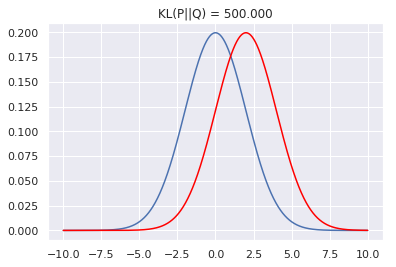

In [3]:
def kl_divergence(p, q):
  #Not sure what the 0 at the end is for.
  return np.sum(np.where(p != 0, p*np.log(p/q), 0))

x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)

plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red');


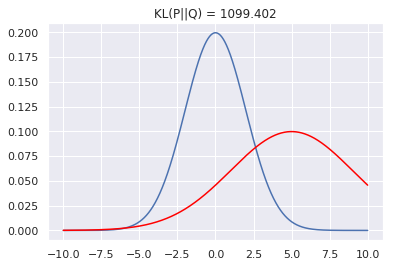

In [4]:
q = norm.pdf(x, 5, 4)

plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red');

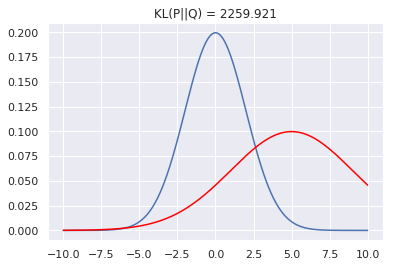

In [5]:
# Not the same KL divergence if we switch P and Q!
plt.title('KL(P||Q) = %1.3f' % kl_divergence(q, p))
plt.plot(x, p)
plt.plot(x, q, c='red');

In [13]:
# Minimizing KL Divergence
x = np.arange(-10, 10, 0.001)
# Reshape pdf to column
p_pdf = norm.pdf(x, 0, 2).reshape(1, -1)
np.random.seed(0)
random_mean = np.random.randint(10, size=1)
random_sigma = np.random.randint(10, size=1)
random_pdf = norm.pdf(x, random_mean, random_sigma).reshape(1, -1)

learning_rate = 0.001
epochs = 100

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1720: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [0]:
# Allocate memory for variables
p = tf.placeholder(tf.float64, shape=p_pdf.shape)
mu = tf.Variable(np.zeros(1))
sigma = tf.Variable(np.eye(1))
normal = tf.exp(-tf.square(x - mu) / (2 * sigma))
q = normal / tf.reduce_sum(normal)

In [16]:
# define function to compute KL divergence that excludes probabilities equal to zero)
kl_divergence = tf.reduce_sum(
    tf.where(p == 0, tf.zeros(p_pdf.shape, tf.float64), p * tf.log(p / q))
)

W0823 14:27:09.863508 140403172906880 deprecation.py:323] From <ipython-input-16-db98c161c112>:2: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# initialize gradient descent on kl_divergence function
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(kl_divergence)

In [0]:
# running init will allow the variables to hold the values (zeroes)
init = tf.global_variables_initializer()

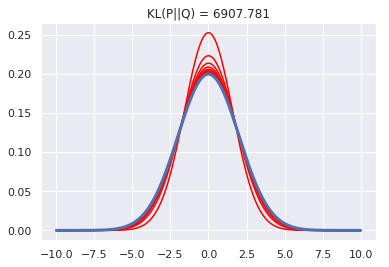

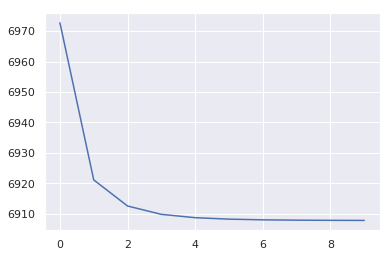

In [22]:
# Apparently all tensorflow operations happen within a session.
with tf.Session() as sess:
  sess.run(init)

  history = []
  means = []
  variances = []

  for i in range(epochs):
    # I think the dict matches elements of p to values in p_pdf
    sess.run(optimizer, { p: p_pdf})
    
    if i % 10 == 0:
      history.append(sess.run(kl_divergence, { p: p_pdf}))
      means.append(sess.run(mu)[0])
      variances.append(sess.run(sigma)[0][0])

  for mean, variance, in zip(means, variances):
    q_pdf = norm.pdf(x, mean, np.sqrt(variance))
    plt.plot(x, q_pdf.reshape(-1, 1), c='red')

plt.title('KL(P||Q) = %1.3f' % history[-1])
plt.plot(x, p_pdf.reshape(-1, 1), linewidth=3)
plt.show()

plt.plot(history)
plt.show()

sess.close()

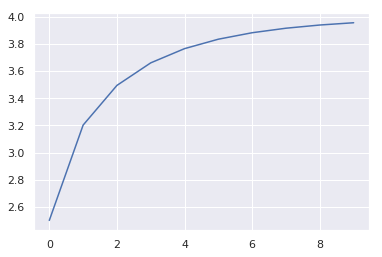

In [27]:
plt.plot(variances)